<a href="https://colab.research.google.com/github/sarthak-somani/SOC-2025-Morphix/blob/main/Sarthak_Somani_SOC_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git

Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 23.15 MiB/s, done.
Resolving deltas: 100% (57/57), done.


In [ ]:
%cd stylegan2-ada-pytorch

/content/stylegan2-ada-pytorch


In [ ]:
!pip install click requests tqdm pyspng ninja imageio-ffmpeg==0.4.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.1/196.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 32.8 MB/s eta 0:00:00
  Attempting uninstall: imageio-ffmpeg
    Found existing installation: imageio-ffmpeg 0.6.0
    Uninstalling imageio-ffmpeg-0.6.0:
      Successfully uninstalled imageio-ffmpeg-0.6.0


In [ ]:
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

--2025-07-27 10:43:30--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 3.163.189.13, 3.163.189.65, 3.163.189.89, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|3.163.189.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M  24.6MB/s    in 16s     

2025-07-27 10:43:46 (23.1 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]



In [ ]:
import numpy as np
import torch
import pickle

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [ ]:
model_path = 'ffhq.pkl'
print(f'Loading networks from "{model_path}"...')

Loading networks from "ffhq.pkl"...


In [ ]:
%cd /content/stylegan2-ada-pytorch
with open(model_path, 'rb') as f:
  G = pickle.load(f)['G_ema'].to(device)
  print('Model loaded successfully.')

/content/stylegan2-ada-pytorch
Model loaded successfully.


In [ ]:
from PIL import Image

def tensor_to_pil(tensor):
        """
        Converts a PyTorch tensor (in NCHW format) to a PIL Image.
        The tensor is expected to be in the range [-1, 1].
        """
        # Denormalize from [-1, 1] to [0, 255]
        tensor = (tensor.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
        # Convert to a PIL image from the first item in the batch
        return Image.fromarray(tensor[0].cpu().numpy(), 'RGB')

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def display_two_images(image1, image2, title1="Image 1", title2="Image 2"):
  """
  Displays two images side-by-side using matplotlib.

  Args:
    image1: The first image to display.
    image2: The second image to display.
    title1 (str): An optional title for the first image.
    title2 (str): An optional title for the second image.
  """
  # Create a figure with 1 row and 2 columns for the subplots.
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))

  # Display the first image on the left subplot (axes[0])
  axes[0].imshow(image1)
  axes[0].set_title(title1)
  axes[0].axis('off') # Hide the axes ticks and labels

  # Display the second image on the right subplot (axes[1])
  axes[1].imshow(image2)
  axes[1].set_title(title2)
  axes[1].axis('off') # Hide the axes ticks and labels

  plt.tight_layout() # Adjust layout to prevent titles from overlapping
  plt.show()

In [ ]:
z_latent = np.random.randn(1, G.z_dim)
z_tensor = torch.from_numpy(z_latent).float().to(device)

with torch.no_grad():
  w_latent = G.mapping(z_tensor, None)
  img_from_w = G.synthesis(w_latent, noise_mode='const')

pil_img_from_w = tensor_to_pil(img_from_w)

Setting up PyTorch plugin "bias_act_plugin"... 

/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... 

/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:2059: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(


Done.


/tmp/ipython-input-9-3687994566.py:11: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return Image.fromarray(tensor[0].cpu().numpy(), 'RGB')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/IIT Bombay /SS - WnCC (Personal)/StyleGAN 2 Boundries

/content/drive/MyDrive/IIT Bombay /SS - WnCC (Personal)/StyleGAN 2 Boundries


In [ ]:
smile_w = np.load('smile.npy')
age_w = np.load('age.npy')
gender_w = np.load('gender.npy')


smile_w_tensor = torch.from_numpy(smile_w).to(device).float()
gender_w_tensor = torch.from_numpy(gender_w).to(device).float()
age_w_tensor = torch.from_numpy(age_w).to(device).float()

In [ ]:
w_latent_new = w_latent + age_w_tensor*3

In [ ]:
img_from_w_latent_new = G.synthesis(w_latent_new, noise_mode='const')
pil_img_from_w_latent_new = tensor_to_pil(img_from_w_latent_new)

/tmp/ipython-input-9-3687994566.py:11: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  return Image.fromarray(tensor[0].cpu().numpy(), 'RGB')


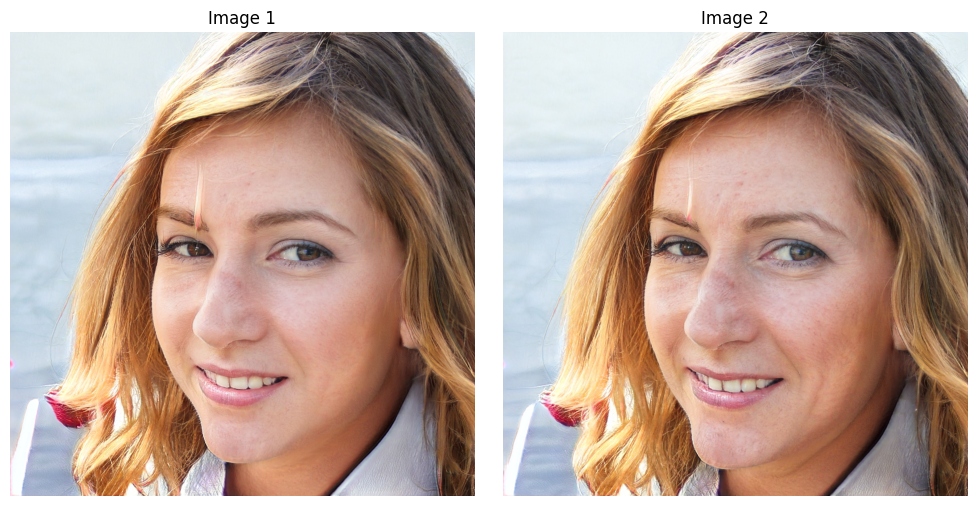

In [ ]:
display_two_images(pil_img_from_w, pil_img_from_w_latent_new)

In [ ]:
!pip install -q streamlit
!npm install -g localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
added 22 packages in 2s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦

In [ ]:
%%writefile app.py
# app.py
import streamlit as st
import numpy as np
from PIL import Image
from io import BytesIO
import os
import requests
import subprocess
import pickle
import torch
import sys  # <--- ADD THIS IMPORT

# --- Constants ---
STYLEGAN_REPO_DIR = "stylegan2-ada-pytorch"
# Add the StyleGAN repo to Python's path to find the custom 'torch_utils' module
sys.path.append(STYLEGAN_REPO_DIR)  # <--- ADD THIS LINE

MODEL_URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl"
MODEL_PATH = os.path.join(STYLEGAN_REPO_DIR, "ffhq.pkl")
MORPHIX_REPO_DIR = "SOC-2025-Morphix"

# --- Page Configuration ---
st.set_page_config(
    page_title="Latent Editor UI",
    page_icon="🎨",
    layout="wide",
)

# --- Helper Functions ---
def tensor_to_pil(tensor):
    """Converts a PyTorch tensor to a PIL Image."""
    tensor = (tensor.permute(0, 2, 3, 1) * 127.5 + 128).clamp(0, 255).to(torch.uint8)
    return Image.fromarray(tensor[0].cpu().numpy(), 'RGB')

def image_to_bytes(img):
    """Converts a PIL Image to bytes for downloading."""
    buf = BytesIO()
    img.save(buf, format="PNG")
    return buf.getvalue()

# --- Backend Loading ---
@st.cache_resource
def load_backend():
    """
    Clones repositories, downloads the model, and loads all assets into memory.
    This function runs only once and its return value is cached.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # 1. Clone StyleGAN repo if it doesn't exist
    if not os.path.exists(STYLEGAN_REPO_DIR):
        st.info("Cloning StyleGAN2-ADA repository...")
        subprocess.run(["git", "clone", "https://github.com/NVlabs/stylegan2-ada-pytorch.git", STYLEGAN_REPO_DIR], check=True)

    # 2. Download StyleGAN model if it doesn't exist
    if not os.path.exists(MODEL_PATH):
        st.info("Downloading StyleGAN model (ffhq.pkl)...")
        with requests.get(MODEL_URL, stream=True) as r:
            r.raise_for_status()
            with open(MODEL_PATH, 'wb') as f:
                for chunk in r.iter_content(chunk_size=8192):
                    f.write(chunk)

    # 3. Load the StyleGAN model
    with open(MODEL_PATH, 'rb') as f:
        G = pickle.load(f)['G_ema'].to(device)
    st.success("✅ StyleGAN model loaded successfully!")

    # 4. Clone the Morphix repo for latent vectors
    if not os.path.exists(MORPHIX_REPO_DIR):
        st.info("Cloning Morphix repository for latent vectors...")
        subprocess.run(["git", "clone", "https://github.com/sarthak-somani/SOC-2025-Morphix.git", MORPHIX_REPO_DIR], check=True)

    # 5. Load latent direction vectors
    try:
        smile_w = np.load(os.path.join(MORPHIX_REPO_DIR, 'Models', 'smile.npy'))
        age_w = np.load(os.path.join(MORPHIX_REPO_DIR, 'Models', 'age.npy'))
        gender_w = np.load(os.path.join(MORPHIX_REPO_DIR, 'Models', 'gender.npy'))
        st.success("✅ Latent vectors loaded successfully!")
    except FileNotFoundError as e:
        st.error(f"Error loading latent vectors: {e}")
        return None

    # Return all loaded assets in a dictionary
    return {
        "G": G,
        "device": device,
        "age_w": torch.from_numpy(age_w).to(device),
        "smile_w": torch.from_numpy(smile_w).to(device),
        "gender_w": torch.from_numpy(gender_w).to(device),
    }

# --- Load assets and store them in session state ---
if 'backend_assets' not in st.session_state:
    with st.spinner("🚀 Starting up... Loading models and assets..."):
        st.session_state.backend_assets = load_backend()

# --- Image Generation ---
def generate_image():
    """Generates an image based on current session state values."""
    assets = st.session_state.backend_assets
    if not assets:
        st.error("Backend assets not loaded. Cannot generate image.")
        return Image.new('RGB', (256, 256), color = 'red')

    G = assets["G"]
    device = assets["device"]

    z_tensor = torch.from_numpy(st.session_state.z_latent).to(device)

    with torch.no_grad():
        w_latent = G.mapping(z_tensor, None)
        w_latent_new = w_latent + \
                       assets['age_w'] * st.session_state.age_strength + \
                       assets['smile_w'] * st.session_state.smile_strength + \
                       assets['gender_w'] * st.session_state.gender_strength
        img_tensor = G.synthesis(w_latent_new, noise_mode='const')

    return tensor_to_pil(img_tensor)

# --- Session State Initialization ---
if 'image' not in st.session_state:
    if st.session_state.backend_assets:
        G = st.session_state.backend_assets["G"]
        st.session_state.z_latent = np.random.randn(1, G.z_dim)
        st.session_state.age_strength = 0.0
        st.session_state.smile_strength = 0.0
        st.session_state.gender_strength = 0.0
        st.session_state.image = generate_image()

# --- Callbacks ---
def update_image_callback():
    st.session_state.image = generate_image()

def random_face_callback():
    G = st.session_state.backend_assets["G"]
    st.session_state.z_latent = np.random.randn(1, G.z_dim)
    # Reset sliders and update image
    st.session_state.age_strength = 0.0
    st.session_state.smile_strength = 0.0
    st.session_state.gender_strength = 0.0
    update_image_callback()

def reset_sliders_callback():
    st.session_state.age_strength = 0.0
    st.session_state.smile_strength = 0.0
    st.session_state.gender_strength = 0.0
    update_image_callback()

# --- UI Layout ---
st.title("🎨 Real-Time Latent Editing Interface")

# Check if backend loaded properly before drawing the main UI
if not st.session_state.backend_assets or 'image' not in st.session_state:
    st.error("Application failed to initialize. Please check the logs.")
    # Add a button to rerun the script if initialization fails
    if st.button("Retry Initialization"):
        st.caching.clear_cache()
        st.experimental_rerun()
else:
    with st.sidebar:
        st.header("Controls")
        st.slider("Age", -5.0, 5.0, key="age_strength", on_change=update_image_callback)
        st.slider("Smile", -5.0, 5.0, key="smile_strength", on_change=update_image_callback)
        st.slider("Gender", -5.0, 5.0, key="gender_strength", on_change=update_image_callback)
        st.markdown("---")
        col1, col2 = st.columns(2)
        with col1:
            st.button("New Face", on_click=random_face_callback, use_container_width=True)
        with col2:
            st.button("Reset Sliders", on_click=reset_sliders_callback, use_container_width=True)
        st.download_button(
            label="💾 Save Image",
            data=image_to_bytes(st.session_state.image),
            file_name="generated_face.png",
            mime="image/png",
            use_container_width=True,
        )

    st.image(st.session_state.image, caption="Generated by the Backend", use_column_width=True)

Overwriting app.py


In [ ]:
!curl ipecho.net/plain

34.83.119.81

In [ ]:
# Step 1: Install all necessary packages quietly
!pip install -q streamlit numpy torch requests Pillow

# Step 2: Run the Streamlit app in the background on a fixed port (8501)
!streamlit run app.py --server.port 8501 &>/dev/null&

# Step 3: Wait a few seconds for the app to start up
import time
time.sleep(10)

# Step 4: Use localtunnel to expose the correct port
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧your url is: https://four-pans-throw.loca.lt
^C
